Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits):

1. Measure accuracy of your model using different kernels such as 'rbf' and 'linear'.
2. Tune your model further using regularization (C) and gamma parameters and try to come up with highest accuracy score.
3. Use 80% of samples as training data size.

In [223]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [224]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [225]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [226]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [227]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [228]:
len(digits.target)

1797

In [229]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [230]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

<Figure size 640x480 with 0 Axes>

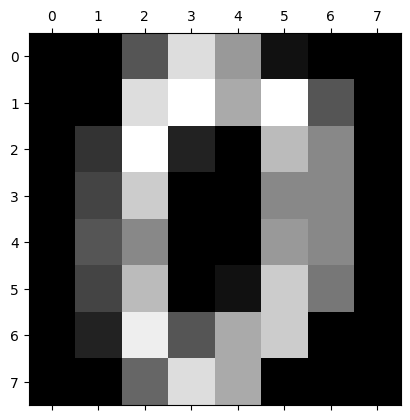

In [231]:
plt.gray() 
plt.matshow(digits.images[0])

In [232]:
# df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [233]:
df['target'] = digits.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## Data Analysis & Preprocessing

In [234]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [235]:
df["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [236]:
X = df.drop('target', axis='columns')
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [237]:
y = df['target']
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

## Model

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [239]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1109,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,...,15.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,6.0
940,0.0,3.0,12.0,12.0,14.0,4.0,0.0,0.0,0.0,1.0,...,8.0,0.0,0.0,2.0,13.0,16.0,16.0,16.0,2.0,0.0
192,0.0,1.0,10.0,15.0,16.0,13.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,15.0,13.0,7.0,0.0,0.0,0.0
260,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0
1148,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,1.0,8.0,14.0,15.0,2.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,1.0,9.0,12.0,13.0,9.0,0.0,0.0
1216,0.0,2.0,9.0,15.0,16.0,15.0,2.0,0.0,0.0,11.0,...,7.0,0.0,0.0,0.0,12.0,16.0,15.0,9.0,1.0,0.0
1653,0.0,0.0,5.0,14.0,14.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0
559,0.0,0.0,4.0,10.0,15.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,4.0,0.0,0.0,0.0


In [240]:
X_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1081,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,13.0,13.0,8.0,13.0,16.0,8.0
1707,0.0,1.0,15.0,14.0,2.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,1.0,15.0,16.0,12.0,1.0,0.0,0.0
927,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,...,6.0,0.0,0.0,1.0,13.0,16.0,16.0,16.0,16.0,3.0
713,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,7.0,14.0,16.0,12.0,1.0,0.0
262,0.0,0.0,3.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,3.0,13.0,15.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.0,0.0,3.0,8.0,11.0,13.0,14.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2.0,12.0,13.0,2.0,0.0,0.0
557,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,0.0
1730,0.0,1.0,9.0,16.0,16.0,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,11.0,4.0,0.0,0.0
638,0.0,0.0,0.0,3.0,14.0,13.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,3.0,13.0,15.0,2.0,0.0


In [241]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [242]:
y_pred = model.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [243]:
y_test

1081    2
1707    8
927     2
713     6
262     6
       ..
506     5
557     4
1730    3
638     8
829     8
Name: target, Length: 360, dtype: int32

In [244]:
model.score(X_test, y_test)

0.9916666666666667

Text(0.5, 1.0, 'Confusion Matrix')

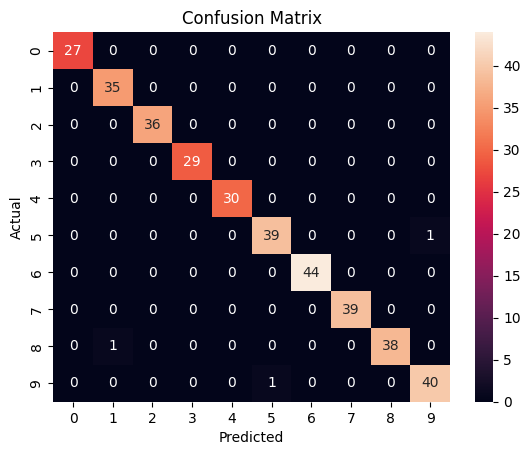

In [245]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Tune parameters

**1. Kernel:**

In [246]:
# linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [247]:
model_linear.score(X_test, y_test)

0.9777777777777777

Linear has Lower score than when 'Kernel = rbf'

Text(0.5, 1.0, 'Confusion Matrix')

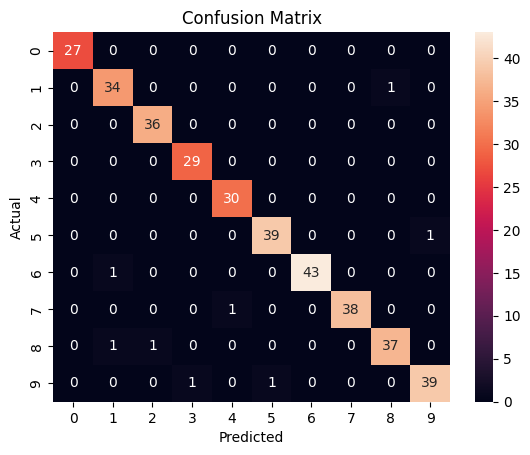

In [248]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_linear.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [249]:
# poly kernel
model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [250]:
model_poly.score(X_test, y_test)

0.9888888888888889

poly is even lower than linear

Text(0.5, 1.0, 'Confusion Matrix')

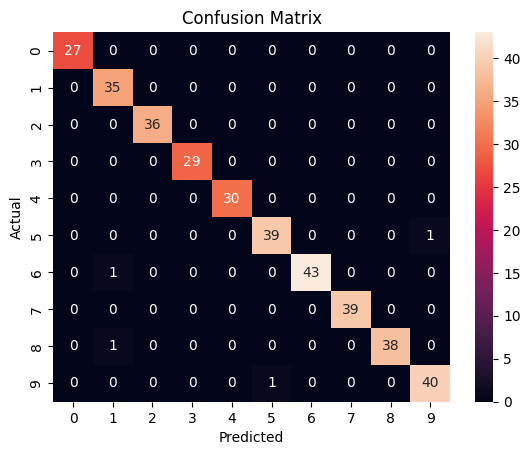

In [251]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_poly.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [252]:
# sigmoid kernel
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [253]:
model_sigmoid.score(X_test, y_test)

0.9138888888888889

sigmoid is even lower than linear

Text(0.5, 1.0, 'Confusion Matrix')

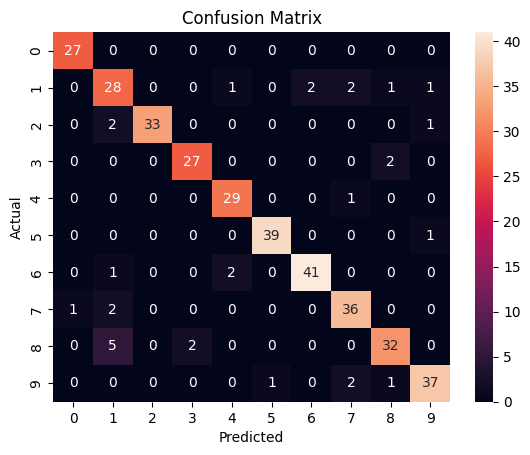

In [254]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_sigmoid.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

**2. Regularization(C):**

In [255]:
model_C = SVC(C=9)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9916666666666667

No effect of 'C' on the model.score()

**3. Gamma:**

In [256]:
# default
model_g = SVC(gamma='scale')
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9916666666666667

In [257]:
model_g = SVC(gamma='auto')
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.325

In [258]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.08055555555555556

Changing the "gamma = 'scale'" from any other has a negative impact